# Data Wrangling <a id='Data_Wrangling'></a>

### Sourcing and Loading

In [1]:
import pandas as pd

data = pd.read_csv('data.csv', index_col=0)
data.head()

id  gender  age industry sign         date  \
0  1000331  female   37   indUnk  Leo  31,May,2004   
1  1000331  female   37   indUnk  Leo  29,May,2004   
2  1000331  female   37   indUnk  Leo  28,May,2004   
3  1000331  female   37   indUnk  Leo  28,May,2004   
4  1000331  female   37   indUnk  Leo  28,May,2004   

                                                blog  
0  Well, everyone got up and going this morning. ...  
1  My four-year old never stops talking.  She'll ...  
2  Actually it's not raining yet, but I bought 15...  
3  Ha! Just set up my RSS feed - that is so easy!...  
4  Oh, which just reminded me, we were talking ab...

### Creating datetime column

In [2]:
data_counts = data['date'].value_counts()
data_counts

02,August,2004      16153
01,August,2004      12806
03,August,2004      11577
05,August,2004       9191
04,August,2004       8481
                    ...  
18,Juli,2004            1
06,avril,2004           1
11,juli,2004            1
25,October,2004         1
11,augustus,2004        1
Name: date, Length: 2618, dtype: int64

A quick look at our `date` column reveals that there are some unrecognized months contained in the dates. After a Google search, I discovered that these were in fact valid months, but in **languages other than English**. Even so, this would undoubtedly cause an error if I tried to convert the column into a datetime series. In order to fix this, I will use a list of English months in order to **isolate the dates that are in foreign languages**.

In [3]:
months_list = ['January','january','February','february','March','march','April','april','May','may','June','june','July',
              'july','August','august','September','september','October','october','November','november','December','december']

foreign_dates = [date for date in data_counts.index if not any(month in date.split(',') for month in months_list)]
foreign_dates[:10]

['25,Julho,2004',
 '04,Julho,2004',
 '02,Maio,2004',
 '23,Maio,2004',
 '16,Maio,2004',
 '13,Junho,2004',
 '20,Junho,2004',
 '01,agosto,2004',
 '21,junio,2004',
 '04,ottobre,2003']

In [4]:
len(foreign_dates)

865

In [5]:
865 / 677596

0.0012765718805896138

Since there are only **865 rows** with foreign months in our **dataset of 677,596** (which is **~0.13%** of all data), we can afford to simply delete these rows.

In [6]:
df = data[~data['date'].isin(foreign_dates)]
df_counts = df['date'].value_counts()
df_counts[:10]

02,August,2004    16153
01,August,2004    12806
03,August,2004    11577
05,August,2004     9191
04,August,2004     8481
09,August,2004     7682
02,July,2004       7587
10,August,2004     7385
01,July,2004       6778
02,June,2004       6535
Name: date, dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['date'].str.replace(',', ' '), format='%d %B %Y')
df.info()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 669893 entries, 0 to 677595
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        669893 non-null  int64         
 1   gender    669893 non-null  object        
 2   age       669893 non-null  int64         
 3   industry  669893 non-null  object        
 4   sign      669893 non-null  object        
 5   date      669893 non-null  datetime64[ns]
 6   blog      669892 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 40.9+ MB


In [8]:
min(df['date']), max(df['date'])

(Timestamp('1999-01-01 00:00:00'), Timestamp('2006-08-23 00:00:00'))

Now that our datetime column has been properly converted, we can see that **the oldest blog post in our data was written in January 1, 1999, while the most recent blog post was written in August 23, 2006**. After resetting the index to account for the deleted rows, I will move on to the next step in my data wrangling process.

In [9]:
df.reset_index(inplace=True, drop=True)

### Clean `industry` column

In [10]:
df['industry'].value_counts()

indUnk                     247727
Student                    150986
Technology                  41482
Arts                        31792
Education                   29043
Communications-Media        19727
Internet                    15733
Non-Profit                  14528
Engineering                 11463
Law                          8961
Publishing                   7679
Science                      7179
Government                   6755
Consulting                   5791
Religion                     5044
Fashion                      4831
Advertising                  4651
Marketing                    4363
BusinessServices             4337
Banking                      4033
Chemicals                    3910
Accounting                   3800
Telecommunications           3717
Military                     3120
Museums-Libraries            3050
Sports-Recreation            3016
HumanResources               2888
RealEstate                   2863
Transportation               2299
Manufacturing 

The `industry` column is quite clean for the most part, but for readability purposes I would like to simply change *indUnk* to *Unknown* instead.

In [11]:
df.head()

id  gender  age industry sign       date  \
0  1000331  female   37   indUnk  Leo 2004-05-31   
1  1000331  female   37   indUnk  Leo 2004-05-29   
2  1000331  female   37   indUnk  Leo 2004-05-28   
3  1000331  female   37   indUnk  Leo 2004-05-28   
4  1000331  female   37   indUnk  Leo 2004-05-28   

                                                blog  
0  Well, everyone got up and going this morning. ...  
1  My four-year old never stops talking.  She'll ...  
2  Actually it's not raining yet, but I bought 15...  
3  Ha! Just set up my RSS feed - that is so easy!...  
4  Oh, which just reminded me, we were talking ab...

In [12]:
df = df.replace('indUnk', 'Unknown')
df['industry'].value_counts()

Unknown                    247727
Student                    150986
Technology                  41482
Arts                        31792
Education                   29043
Communications-Media        19727
Internet                    15733
Non-Profit                  14528
Engineering                 11463
Law                          8961
Publishing                   7679
Science                      7179
Government                   6755
Consulting                   5791
Religion                     5044
Fashion                      4831
Advertising                  4651
Marketing                    4363
BusinessServices             4337
Banking                      4033
Chemicals                    3910
Accounting                   3800
Telecommunications           3717
Military                     3120
Museums-Libraries            3050
Sports-Recreation            3016
HumanResources               2888
RealEstate                   2863
Transportation               2299
Manufacturing 

### Make `age` an integer

In [13]:
df['age'] = df['age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669893 entries, 0 to 669892
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        669893 non-null  int64         
 1   gender    669893 non-null  object        
 2   age       669893 non-null  int32         
 3   industry  669893 non-null  object        
 4   sign      669893 non-null  object        
 5   date      669893 non-null  datetime64[ns]
 6   blog      669892 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 33.2+ MB


### Check other columns

In [14]:
df.isnull().sum()

id          0
gender      0
age         0
industry    0
sign        0
date        0
blog        1
dtype: int64

In [15]:
df['gender'].value_counts()

male      340133
female    329760
Name: gender, dtype: int64

In [16]:
df['age'].value_counts()

17    79417
24    78357
16    71591
23    71410
25    65975
26    53659
27    45180
15    41347
14    27012
34    21259
33    17469
35    17380
36    14164
13    12931
37     9246
38     7391
39     5456
40     5004
45     4417
43     4150
41     3707
48     3564
42     2902
46     2731
47     2138
44     2036
Name: age, dtype: int64

In [17]:
df['sign'].value_counts()

Cancer         63816
Aries          63363
Libra          61657
Taurus         61204
Virgo          59226
Scorpio        56473
Leo            53167
Pisces         53007
Gemini         51264
Sagittarius    49116
Aquarius       49008
Capricorn      48592
Name: sign, dtype: int64

### Impute NaN `blog`

We can see that there is one `blog` entry that is NaN, so I will take a closer look at that entry to see if I can impute it.

In [18]:
df[df['blog'].isnull()]

id  gender  age              industry       sign       date blog
189626  2283987  female   23  Communications-Media  Capricorn 2004-04-29  NaN

Using the details in my DataFrame, I was able to find the problem blog. Here is what it looks like:

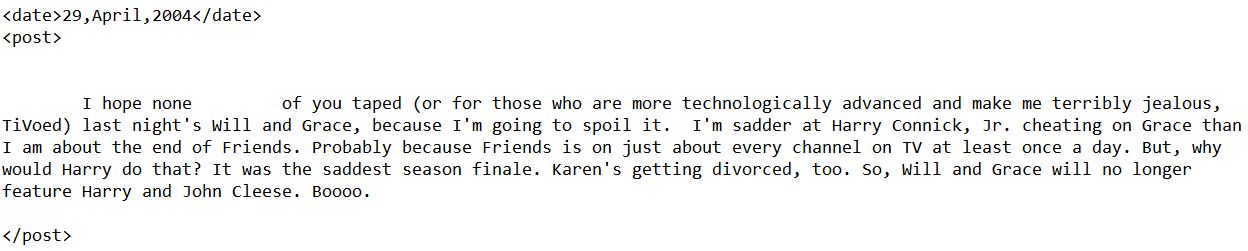

We can see that the **whitespace near the beginning of the paragraph** is likely what caused it to be interpreted as NaN. I will simply copy and paste it into my DataFrame without the whitespace.

In [19]:
df['blog'][189626] = 'I hope none of you taped (or for those who are more technologically advanced and make me terribly jealous, TiVoed) last night\'s Will and Grace, because I\'m going to spoil it.  I\'m sadder at Harry Connick, Jr. cheating on Grace than I am about the end of Friends. Probably because Friends is on just about every channel on TV at least once a day. But, why would Harry do that? It was the saddest season finale. Karen\'s getting divorced, too. So, Will and Grace will no longer feature Harry and John Cleese. Boooo.'
df.iloc[189626]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


id                                                    2283987
gender                                                 female
age                                                        23
industry                                 Communications-Media
sign                                                Capricorn
date                                      2004-04-29 00:00:00
blog        I hope none of you taped (or for those who are...
Name: 189626, dtype: object

### Remove duplicate blogs

In [20]:
blogs = df['blog']
duplicate_series = blogs[blogs.duplicated(keep=False)]
duplicate_series.head()

20     Eventful day...well, sort of. Eventful to me c...
21     Eventful day...well, sort of. Eventful to me c...
125    I'm going to smile like nothing's wrong, talk ...
163    I'm going to smile like nothing's wrong, talk ...
248    You represent... naivete. So innocent and trus...
Name: blog, dtype: object

In [21]:
len(duplicate_series)

105915

Although I was excited at first to discover such a large amount of data, it looks like a large chunk of it contains duplicate blogs. In fact, **almost 1/6 (105,915) of the entire dataset's blogs are duplicates**. This is quite unfortunate, as this makes up a large portion of the data. However, even if I were to remove every duplicate blog, I would still have **more than 500,000 blogs**, which is still plenty for an NLP project. Nonetheless, I will take a more **nuanced approach** with the duplicate blogs. 

In [22]:
import numpy as np

duplicate_blog_lengths = list(map(len,duplicate_series))
np.mean(duplicate_blog_lengths)

751.7636689798424

At first, I thought most of the duplicate blogs would be short. If the dataset was not corrupted at all, there could be certain blogs that, if identical, would be entirely permitted (for example, **many users' first blogs were simply the word "test"**). However, **the average duplicate blog contained ~752 characters**, which is unacceptable. Having that many duplicate characters could only mean that *the dataset was corrupted*, and this needs to be remedied. Nonetheless, since many short, duplicate blogs are most likely valid, I will remove them from consideration and focus on **removing duplicate blogs which contain more than 50 characters**, just to be safe.

In [23]:
duplicate_df = df[df.duplicated(['blog'])].sort_values('blog').drop_duplicates('blog',keep='first')

# Only remove duplicate blogs with more than 50 characters
duplicate_list = [blog for blog in duplicate_df['blog'] if len(blog) > 50]
len(duplicate_list)

33471

In [24]:
from tqdm import tqdm

blogs_to_drop = [blog for blog in tqdm(duplicate_list, position=0, leave=True) if len(np.unique(df[df['blog'] == blog]['gender'])) != 1]
len(blogs_to_drop)

100%|████████████████████████████████████████████████████████████████████████████| 33471/33471 [49:12<00:00, 11.34it/s]


14530

In [25]:
df.shape

(669893, 7)

In [26]:
df = df.drop(df[df['blog'].isin(blogs_to_drop)].index)
df.shape, max(df.index)

((625878, 7), 669892)

In [27]:
blogs_to_keep_1 = [blog for blog in tqdm(duplicate_list, position=0, leave=True) if blog not in blogs_to_drop]
len(duplicate_list), len(blogs_to_drop), len(blogs_to_keep_1)

100%|██████████████████████████████████████████████████████████████████████████| 33471/33471 [00:17<00:00, 1948.12it/s]


(33471, 14530, 18941)

In [35]:
remainder_duplicates_index = df[df['blog'].isin(blogs_to_keep_1)].index
remainder_duplicates_df = df[df['blog'].isin(blogs_to_keep_1)]
keep_1_index = remainder_duplicates_df.drop_duplicates('blog',keep='first').index
drop_index = [index for index in tqdm(remainder_duplicates_index, position=0, leave=True) if index not in keep_1_index]
df = df.drop(drop_index)
df.shape, max(df.index)

100%|████████████████████████████████████████████████████████████████████████| 46401/46401 [00:00<00:00, 752593.40it/s]


((598418, 7), 669892)

In [37]:
df = df.reset_index(drop=True)
max(df.index)

598417

With our final cleanups done, I can now save the DataFrame locally to use it in my data analysis.

### Save DataFrame

In [38]:
df.to_csv('df.csv')